# Joint distributions exercise

You are given a three-dimensional dataset with variables:

- 'Wsp' is the 10-minute average wind speed;
- 'SigmaU' is the standard deviation of the 10-minute average wind speed;
- 'Rho' is the air density

The wind speed and turbulence are conditionally dependent on each other, while the air density can be considered independent from the other two variables. 

Your task is to:

1) Load the dataset 'Multivariate_dist_exercise_data.csv' into pandas
2) Try to plot the variables and illustrate their dependencies
3) Fit a marginal Weibull distribution to the wind speed 
4) Fit a conditional LogNormal distribution to the turbulence, considering a linear or quadratic dependence of the mean turbulence to the wind speed;
5) Fit a Normal distribution to the air density: does it have to be conditional or not?
6) Try to generate a random sample of the three varaibles and compare to the original data set

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
import sklearn
import sklearn.neural_network
import seaborn as sns

In [7]:
WindData = pd.read_csv('HovsoreData_Sonic_100m_2004-2013.csv')

In [8]:
WindData.head()


,Timestamp,Wsp,TI,"TI,detrend",MeanDir,MeanTrigDir,StdDir,MinDir,MaxDir
0,200410010000,9.9196,0.0181,0.0145,346.7130,346.7130,0.8440,343.893,349.044
1,200410010020,9.5073,0.0145,0.0116,346.9852,346.9852,0.6518,344.751,348.949
2,200410010030,9.5274,0.0210,0.0195,346.9152,346.9151,0.7949,343.754,350.588
3,200410010040,9.9498,0.0253,0.0195,346.3204,346.3204,0.7549,343.971,349.953
4,200410010050,10.2376,0.0151,0.0134,345.4185,345.4185,0.6362,343.074,348.960


In [9]:
# Filter rows where 'Wsp' is less than or equal to 35 m/s
filtered_WindData = WindData[WindData['Wsp'] <= 35]
        

In [10]:
filtered_WindData['Wsp'].max()

34.9364

In [11]:
filtered_WindData['Wsp'].std()

4.672544931963302

In [12]:
filtered_WindData.mean()

Timestamp      2.008729e+11
Wsp            8.709050e+00
TI             9.825005e-02
TI,detrend     8.847974e-02
MeanDir        2.041222e+02
MeanTrigDir    2.043276e+02
StdDir         1.043677e+01
MinDir         1.701455e+02
MaxDir         2.306779e+02
dtype: float64

In [13]:
# Iterate through the DataFrame
#for index, row in filtered_WindData.iterrows():
#    if row['TI'] <= 0.001:
#        print("Dropping a line...")
#        # Drop the line
#        filtered_WindData.drop(index, inplace=True)

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)


Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...


C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.drop(index, inplace=True)
C:\Users\joram\AppData\Local\Temp\ipykernel_8292\981401393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_WindData.

Dropping a line...
Dropping a line...
Dropping a line...
Dropping a line...



KeyboardInterrupt



In [14]:
filtered_WindData.loc[filtered_WindData["TI"] <= 0.001] = np.nan

In [15]:
filtered_WindData = filtered_WindData.dropna()

In [16]:
filtered_WindData.mean()

Timestamp      2.008733e+11
Wsp            8.838920e+00
TI             1.002471e-01
TI,detrend     9.027817e-02
MeanDir        2.049722e+02
MeanTrigDir    2.051848e+02
StdDir         1.045798e+01
MinDir         1.708330e+02
MaxDir         2.315387e+02
dtype: float64

In [17]:
# Save the filtered data to a new CSV file
filtered_csv_file = 'FilteredWindData.csv'
filtered_WindData.to_csv(filtered_csv_file, index=False)

In [18]:
WindData = filtered_WindData
WindData

,Timestamp,Wsp,TI,"TI,detrend",MeanDir,MeanTrigDir,StdDir,MinDir,MaxDir
0,2.004100e+11,9.9196,0.0181,0.0145,346.7130,346.7130,0.8440,343.893,349.044
1,2.004100e+11,9.5073,0.0145,0.0116,346.9852,346.9852,0.6518,344.751,348.949
2,2.004100e+11,9.5274,0.0210,0.0195,346.9152,346.9151,0.7949,343.754,350.588
3,2.004100e+11,9.9498,0.0253,0.0195,346.3204,346.3204,0.7549,343.971,349.953
4,2.004100e+11,10.2376,0.0151,0.0134,345.4185,345.4185,0.6362,343.074,348.960
...,...,...,...,...,...,...,...,...,...
439507,2.013083e+11,15.6264,0.0773,0.0589,299.8040,299.8043,2.6738,288.901,309.955
439508,2.013083e+11,13.7150,0.0576,0.0576,298.0319,298.0315,3.2644,288.643,309.245
439509,2.013083e+11,13.4969,0.0797,0.0654,297.7226,297.7242,3.5721,284.827,306.117
439510,2.013083e+11,13.4135,0.1034,0.0901,294.6266,294.6243,3.9459,283.195,310.353


8.83891997435993
--------------------------------
0          9.9196
1          9.5073
2          9.5274
3          9.9498
4         10.2376
           ...   
439507    15.6264
439508    13.7150
439509    13.4969
439510    13.4135
439511    13.7091
Name: Wsp, Length: 429796, dtype: float64
--------------------------------
0         0.179545
1         0.137856
2         0.200075
3         0.251730
4         0.154588
            ...   
439507    1.207921
439508    0.789984
439509    1.075703
439510    1.386956
439511    1.131001
Name: SigmaU, Length: 429796, dtype: float64
--------------------------------
           Timestamp      Wsp      TI  TI,detrend   MeanDir  MeanTrigDir  \
0       2.004100e+11   9.9196  0.0181      0.0145  346.7130     346.7130   
1       2.004100e+11   9.5073  0.0145      0.0116  346.9852     346.9852   
2       2.004100e+11   9.5274  0.0210      0.0195  346.9152     346.9151   
3       2.004100e+11   9.9498  0.0253      0.0195  346.3204     346.3204   
4       2.

C:\Users\joram\AppData\Local\Temp\ipykernel_8292\4281962635.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WindData["SigmaU"] = WindData['Wsp']*WindData['TI']


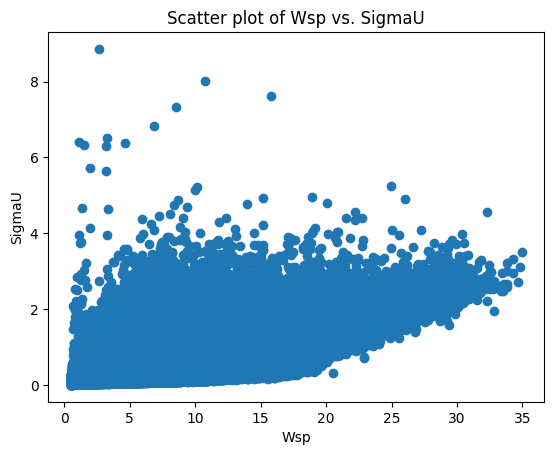

In [19]:
# Does not work since you don't have rho and sigmuU -- ORIGINAL
mean_winddata = np.mean(WindData['Wsp'])
print(mean_winddata)
print("--------------------------------")
print(WindData['Wsp'])
WindData["SigmaU"] = WindData['Wsp']*WindData['TI']
print("--------------------------------")

print(WindData["SigmaU"])
print("--------------------------------")
print(WindData)

# Scatter plot of Wsp and SigmaU
plt.scatter(WindData['Wsp'], WindData["SigmaU"])
plt.xlabel('Wsp')
plt.ylabel('SigmaU')
plt.title('Scatter plot of Wsp vs. SigmaU')
plt.show()

# WindData['Rho'] = WindData['Wsp']*WindData['TI,detrend']

# # Histogram of Rho
# plt.hist2d(WindData['Rho'], bins=20,vmax=10)
# plt.xlabel('Rho')
# plt.ylabel('Frequency')
# plt.title('Histogram of Rho')
# plt.show()

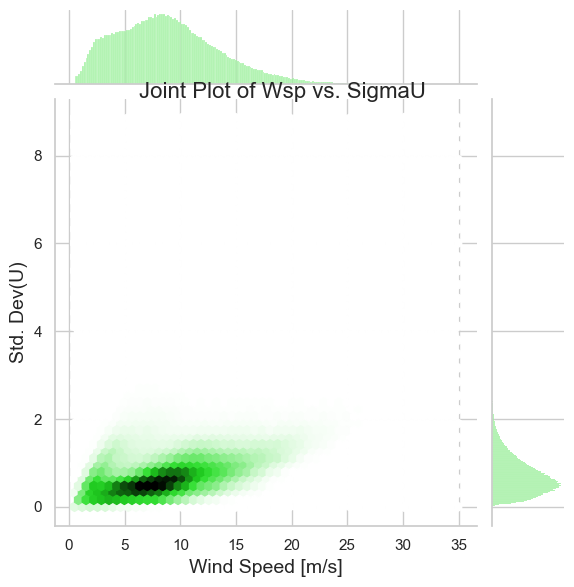

In [20]:
# Scatter plot of Wsp and SigmaU -- HEX
sns.set(style="whitegrid", palette="pastel")
sns.jointplot(x=WindData['Wsp'], y=WindData['SigmaU'], kind='hex', color='lightgreen')#.plot_joint(sns.kdeplot)
plt.xlabel('Wind Speed [m/s]', fontsize=14)
plt.ylabel('Std. Dev(U)', fontsize=14)
plt.suptitle('Joint Plot of Wsp vs. SigmaU', fontsize=16, y=0.85)
plt.show()

In [ ]:
# Scatter plot of Wsp and SigmaU -- Scatter + KDE
sns.set(style="whitegrid", palette="pastel")
sns.jointplot(x=WindData['Wsp'], y=WindData['SigmaU'], kind='scatter', color='lightgreen').plot_joint(sns.kdeplot)
plt.xlabel('Wind Speed [m/s]', fontsize=14)
plt.ylabel('Std. Dev(U)', fontsize=14)
plt.suptitle('Joint Plot of Wsp vs. SigmaU', fontsize=16, y=0.80)
plt.show()

In [ ]:
# Helper function - Normal distribution -> first variable is the mean, next one is the std_dev
def NormalDist(task,x,mu=0,sigma=1):
    import numpy as np
    if task == 0: # PDF
        y = (1.0/(sigma*np.sqrt(2.0*np.pi)))*np.exp(-((x - mu)**2)/(2.0*(sigma**2)))
    elif task == 1: # Cumulative
        from scipy.special import erf
        y = 0.5*(1.0 + erf((x - mu)/(sigma*np.sqrt(2))))
    elif task == 2: # Inverse
        from scipy.special import erfinv
        y = mu + sigma*np.sqrt(2)*erfinv(2*x - 1)        
    return y

# JUST A Helper function - lognormal distribution -> this implementation makes it a function of the variable mean and the std_dev
def LogNormDist(task,x,mu,sigma):
    import numpy as np
    tol = 1e-16
    mu = np.asarray(mu)
    mu[mu<tol] = tol
    Eps   = np.sqrt(np.log( 1.0+(sigma/mu)**2 ) ) #-> getting the true functions
    Ksi   = np.log(mu)-0.5*Eps**2
    if task == 0: # PDF
        x[x<=0] = 1e-8
        u =(np.log(x)-Ksi)/Eps
        y = np.exp(-u*u/2.0)/(Eps*x*np.sqrt(2.0*np.pi))
    elif task == 1: # Cummulative
        x[x<=0] = 1e-8
        u =(np.log(x)-Ksi)/Eps
        y= NormalDist(1, u)
    elif task == 2: # Inverse
        y= np.exp(Ksi+Eps*NormalDist(2, x))
    
    return y

In [ ]:
def likelihood(mean, std_dev, data):
    likelihood_values = 1.0 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((data - mean) / std_dev) ** 2)
    return np.prod(likelihood_values)

In [ ]:
# WIND SPEED DISTRIBUTION FIT
Wsp0 = np.asarray(WindData['Wsp'])
print("Wsp0 = ", Wsp0)
print("---------------------------------------")

#Wsp_mean = np.mean(Wsp0)
#Wsp_std = np.std(Wsp0)

WeibLikelihoodFunc = lambda theta: - np.sum( np.log( stats.weibull_min.pdf(Wsp0, loc = 0, scale = theta[0], c = theta[1])) )
print("WeibLikelihoodFunc = ", WeibLikelihoodFunc)
Weib0 = scipy.optimize.minimize(WeibLikelihoodFunc, [5,1])
print("---------------------------------------")

print("Weib0 = ", Weib0)
WeibullA = Weib0.x[0]
Weibullk = Weib0.x[1]
print("---------------------------------------")
print("WeibullA = ", WeibullA)
print("Weibullk = ", Weibullk)

In [ ]:
WspBinEdges = np.arange(3.5,33.5,1)
WspBinCenters = WspBinEdges[:-1] + 0.5

WspBinCenters.shape

In [ ]:
WspBinEdges.shape

In [ ]:
WspBinEdges

In [ ]:
WspBinCenters

In [ ]:
MuSigmaBinned = np.zeros(len(WspBinCenters))
SigmaSigmaBinned = np.zeros(len(WspBinCenters))

nData = len(WindData['Wsp'])
    
# Per wind speed
for iWsp in range(len(WspBinCenters)): #we are simply selecting here (we want higher than the lower edge, and lower than upper edge)
    WspBinSelection = (WindData['Wsp'] > WspBinEdges[iWsp]) & (WindData['Wsp'] <= WspBinEdges[iWsp + 1]) #select data that falls in the bin
    MuSigmaBinned[iWsp] = np.mean(WindData.loc[WspBinSelection,'SigmaU'])
    SigmaSigmaBinned[iWsp] = np.std(WindData.loc[WspBinSelection,'SigmaU'])
    


In [ ]:
MuSigmaBinned

In [ ]:
plt.plot(WspBinCenters, MuSigmaBinned, "-ok")
plt.plot(WspBinCenters, SigmaSigmaBinned, "-xb") # for turbulence this is a common assumption

# The std dev of turbulence is constant (see figure)

# fun fact: for the mean, for high wind speed, you have bigger waves offshore, it increases surface roughness, increases turbulence
# therefore you get this relationship, this site is close to the sea


# the mean can be quadratically dependent of the wind speed as well

In [ ]:
Mudatax = WspBinCenters[~np.isnan(MuSigmaBinned)]
Mudatay = MuSigmaBinned[~np.isnan(MuSigmaBinned)]

In [ ]:
MuSigmaBinned

In [ ]:
# we need to make second order polynomial fit

# Use polyfit (for example np.polyfit). Which order works well - 0, 1, or 2?
# pMu = np.polyfit(x,y,deg) #returns highest power first
pMu = np.polyfit(Mudatax,Mudatay,2)

In [ ]:
pMu

In [ ]:
# lets plot the prediction in red
plt.plot(WspBinCenters, MuSigmaBinned, "-ok")
plt.plot(WspBinCenters, SigmaSigmaBinned, "-xb") # for turbulence this is a common assumption
plt.plot(WspBinCenters, (pMu[0]*WspBinCenters**2 + pMu[1]*WspBinCenters + pMu[2]), '-r')

In [ ]:
SigmaSigmaBinned

In [ ]:
np.mean(SigmaSigmaBinned)

In [ ]:
SigmaSigmaRef = np.mean(SigmaSigmaBinned)

# plotting sigma
plt.plot(WspBinCenters, MuSigmaBinned, "-ok")
plt.plot(WspBinCenters, SigmaSigmaBinned, "-xb") # for turbulence this is a common assumption
plt.plot(WspBinCenters, (pMu[0]*WspBinCenters**2 + pMu[1]*WspBinCenters + pMu[2]), '-r')
plt.plot(WspBinCenters, np.ones(WspBinCenters.shape)*SigmaSigmaRef, '-g')# just a constant


# we now have two models that describe the turbulence


# now we have to make functions, so we can do it for different senerios

In [ ]:
# What we want to do here....
#
# We have a cloud of points for a graph of mu and sigma mu
# If you start at a particular windspeed (this is a slice of the graph), based on your data points you can look how your turbulence looks
# You create a normal distribution at that windspeed
# You can calculate mean for every slice , getting multiple points over the curve, calculating mean wind speed
# Simple way to build this graph: create bins, get the mean and std-dev per bin, than you can add a polynomial, creating a continuous curve
# This is what we are doing in this cell


# CONDITION DISTRIBUTION OF TURBULENCE - BASED ON DATA BINNING
WspBinEdges = np.arange(3.5,33.5,1)
WspBinCenters = WspBinEdges[:-1] + 0.5

MuSigmaBinned = np.zeros(len(WspBinCenters))
SigmaSigmaBinned = np.zeros(len(WspBinCenters))

nData = len(WindData['Wsp'])
    
# Per wind speed
for iWsp in range(len(WspBinCenters)):
    WspBinSelection = (WindData['Wsp'] > WspBinEdges[iWsp]) & (WindData['Wsp'] <= WspBinEdges[iWsp + 1])
    MuSigmaBinned[iWsp] = np.mean(WindData.loc[WspBinSelection,'SigmaU'])
    SigmaSigmaBinned[iWsp] = np.std(WindData.loc[WspBinSelection,'SigmaU'])
    
Mudatax = WspBinCenters[~np.isnan(MuSigmaBinned)]
Mudatay = MuSigmaBinned[~np.isnan(MuSigmaBinned)]

# Use polyfit (for example np.polyfit). Which order works well - 0, 1, or 2?
pMu = np.polyfit(Mudatax,Mudatay,2)

SigmaSigmaRef = np.mean(SigmaSigmaBinned)
        
MuSigmaFunc = lambda u: pMu[0]*u**2 + pMu[1]*u + pMu[2]
SigmaSigmaFunc = lambda u: np.ones(u.shape)*SigmaSigmaRef

In [ ]:
# plotting with newly created functions

plt.plot(WspBinCenters, MuSigmaBinned, "-ok")
plt.plot(WspBinCenters, SigmaSigmaBinned, "-xb") # for turbulence this is a common assumption
plt.plot(WspBinCenters, MuSigmaFunc(WspBinCenters), '-r')
plt.plot(WspBinCenters, SigmaSigmaFunc(WspBinCenters), '-g')# just a constant

In [ ]:
# monte Carlo generation of random joint wind + turbulence realizations
NMC = 10000

Urand = stats.weibull_min.rvs(scale = WeibullA, c = Weibullk, size = NMC) # u can also use ppa instead of rvs
#SigmaUrand = 

In [ ]:
# radnom test
NMC = 10000
Fwind = np.random.rand(NMC)
Urand = stats.weibull_min.ppf(Fwind, scale = WeibullA, c = Weibullk) 

In [ ]:
plt.hist(Urand,30)

In [ ]:
# Now do sigma 

FsigmaU = np.random.rand(NMC)
MuSigmaU = MuSigmaFunc(Urand)

plt.plot(Urand, MuSigmaU, "xk")
plt.show()

In [ ]:
# new thing will create straight line

SigmaSigmaU = SigmaSigmaFunc(Urand)

plt.plot(Urand, SigmaSigmaU, "xk")
plt.show()

In [ ]:
# use functions all the way above


SigmaUrand = LogNormDist(2,FsigmaU, MuSigmaU, SigmaSigmaU)


plt.plot(Urand, SigmaUrand, "xk")
plt.show()

In [ ]:
# PLOT TURBULENCE INCLUDING DISTRIBUTION PARAMETERS

fig,ax = plt.subplots(1,2, figsize = (12,5))
ax[0].plot(WindData['Wsp'],WindData['SigmaU'],'xk')
ax[0].plot(WspBinCenters,MuSigmaBinned,'-r')
ax[0].plot(WspBinCenters,SigmaSigmaBinned,'-b')
ax[0].plot(WspBinCenters,MuSigmaFunc(WspBinCenters),'--g')
ax[0].set_xlim([0,40])
ax[0].set_ylim([0,7])
ax[1].plot(Urand,SigmaUrand,'*b')
ax[1].set_xlim([0,40])
ax[1].set_ylim([0,7])
plt.show()